In [ ]:
import os
import tqdm
import json
import scipy.stats
import numpy as np
import pandas as pd
import ringity as rg
import networkx as nx
import itertools as it
import matplotlib.pyplot as plt


            
# 2d Circadian Network
G_genes = nx.read_gml("gene.gml")



NameError: name 'remove_selfloops' is not defined

In [3]:
def remove_selfloops(G):
    for u, v in G.edges():
        if u == v:
            G.remove_edge(u,v)
remove_selfloops(G_genes)


In [5]:
G = G_genes

In [7]:
from retrieve_positions import PositionGraph

self = PositionGraph(G)
k = np.sqrt(2*np.pi/len(self.nodelist))
self.make_circular_spring_embedding(k = k,verbose=True)

    
    


100%|█████████████████████████████████████████| 300/300 [28:15<00:00,  5.65s/it]


In [15]:
unadjusted_embedding_dict = self.unadjusted_embedding_dict

!!!REMOVING ALL BUT LARGEST CONNECTED COMPONENT!!!


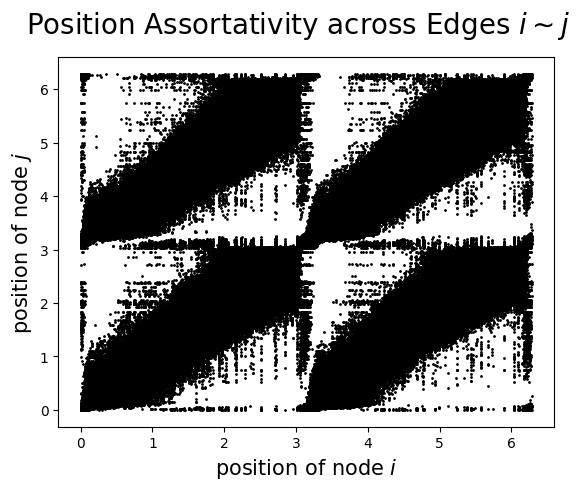

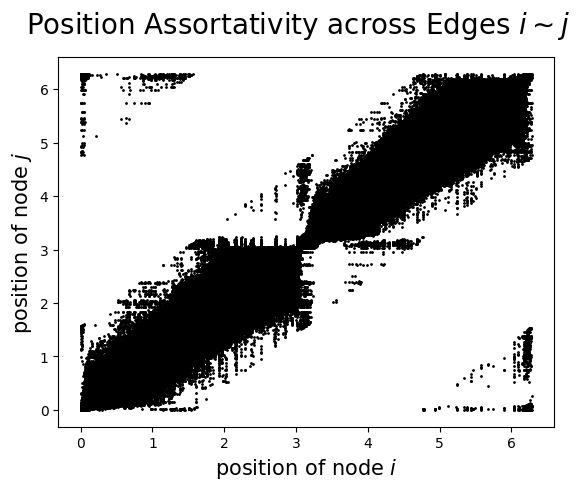

In [20]:
name = "gene"
threshold = np.pi/2
if name == "gene":
    
    G = G_genes

    G_gene_adjusted = G_genes.copy()
    # Extra bit to deal with Gene Network Issue
    for i,j in G_genes.edges():
        direct_d = np.abs(unadjusted_embedding_dict[i] - unadjusted_embedding_dict[j])
        circular_d = min(direct_d, 2*np.pi-direct_d)

        if circular_d > np.pi-threshold:
            G_gene_adjusted.remove_edge(i,j)

if name == "gene":

    fig,ax = plt.subplots()
    xy = np.array([[unadjusted_embedding_dict[i], unadjusted_embedding_dict[j]] for i,j in G_genes.edges()])
    ax.scatter(xy[:,0], xy[:,1], c= 'k', s=1)
    fig.suptitle(r"Position Assortativity across Edges $i \sim j$", fontsize=20)
    ax.set_xlabel(r"position of node $i$", fontsize=15)
    ax.set_ylabel(r"position of node $j$", fontsize=15)
            
            
if name == "gene":

    fig,ax = plt.subplots()
    xy = np.array([[unadjusted_embedding_dict[i], unadjusted_embedding_dict[j]] for i,j in G_gene_adjusted.edges()])
    ax.scatter(xy[:,0], xy[:,1], c= 'k', s=1)
    fig.suptitle(r"Position Assortativity across Edges $i \sim j$", fontsize=20)
    ax.set_xlabel(r"position of node $i$", fontsize=15)
    ax.set_ylabel(r"position of node $j$", fontsize=15)
    #fig.savefig(folder+subfolder+"how_much_variation_in_neighbors_provisional_gene_adjustment.png",dpi=DPI,transparent=True)

if name == "gene":
    G=G_gene_adjusted
    comps = list(nx.connected_components(G))
    lcomp = max(comps, key=len)
    if len(comps) > 1:
        print("!!!REMOVING ALL BUT LARGEST CONNECTED COMPONENT!!!")
    G = G.subgraph(lcomp)
    edgelist = list(G.edges())
    nodelist = list(G.nodes())

    
    

In [23]:
nx.write_gml(G_gene_adjusted, "gene_corrected.gml")